# Regularization in 2D: Traveltime inversion in 2D

### Inversion concepts for multi-method geophysics

> **Inversion concepts for multi-method geophysics**
>
> In case of questions, feel free to contact me:
>
> | Name                     | Email                               |
> |--------------------------|-------------------------------------|
> | Prof. Dr. Florian Wagner | <florian.wagner@gim.rwth-aachen.de> |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In the previous Notebook you already implemented the forward operator
$\mathbf{G}$. Now you will use it to perform inversions.

## 1 Imagine you want to solve the inverse problem, i.e. estimate the slowness of each cell. Do you need regularization to do this? Construct the first-order smoothing matrix.

Test if your smoothing matrix is correct by multiplying it with a
homogeneous model
([`np.ones`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html?highlight=ones#numpy.ones))
and for comparison with a random model
([`np.random.randn`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html?highlight=randn#numpy.random.randn)).
What is the model norm
([`np.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html?highlight=linalg%20norm#numpy.linalg.norm))
$||\mathbf{W_m m_\text{homogeneous}}||_2$? What should it be?

## 2 Construct the generalized inverse $\mathbf{G}^{-g}$ for the first 5 measurements only. For $\mathbf{G}$ and the data you can simply save the files from the previous exercise and load them. Estimate the model parameters for both setups given the data vector from the previous exercise.

Start by defining a helper function, which plots the model vectors as a
colored 2D matrix. This is an extension of the code snippet below.

*Hint*: You can visualize the true and estimated model on the model
grid. The model vector is always used as a vector in the calculations
(also in 2D and 3D). In this 2D example, we can make use of the reshape
method. So assume we want to visualize the number of the model
parameters, we can do this:

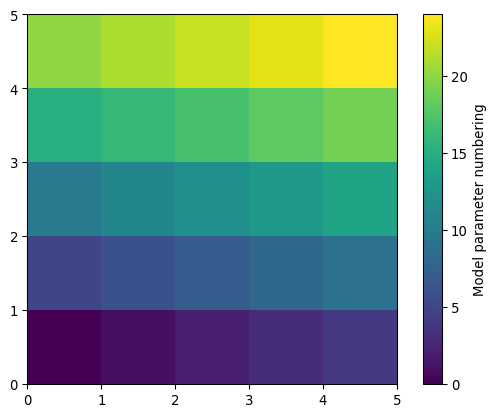

In [3]:
model1d = np.arange(25) # Just the model indices as an example for m
model2d = model1d.reshape((5, 5))[::-1] # rearrange to 5,5 and flip upside down

# Visualize the model as a colored 2D matrix
fig, ax = plt.subplots()
im = ax.imshow(model2d, interpolation='none', extent=[0, 5, 0, 5])
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Model parameter numbering")


# G with 9 measurements and 25 model parameters as defined in the previous exercise
Gf = np.load("G_matrix.npy")

# small G (with first five measurements only)
Gs = Gf[:5]

m = np.load("m_true.npy")
d = np.load("d_obs.npy")

# Helper functions
def plot_model(model_raw=None, nr_data=5, label="Slowness (s/m)", cmap="viridis"):
    """This function plots and annotates the 5x5 model."""
    # define measurements using start and end coordinates
    measurements = [
        # x0, y0, x1, y1
        (4, 0, 5, 1),
        (3, 0, 5, 2),
        (0, 1.5, 5, 1.5),
        (0, 4.5, 5, 4.5),
        (2.5, 0, 2.5, 5),
        (0, 0, 5, 5),
        (0, 3.5, 5, 3.5),
        (0, 2.5, 5, 2.5),
        (0, 0.5, 5, 0.5),
    ]

    # Make empty model if no model is given
    if model_raw is None:
        model_raw = np.zeros(25)
        label = None
    model = np.asarray(model_raw).reshape((5, 5))[::-1]
    
    # Create Plot
    fig, ax = plt.subplots(dpi=110)
    im = ax.imshow(model, interpolation='none', extent=[0, 5, 0, 5],
                   cmap=cmap)
    
    # Create Colorbar labels if one is given
    if label is not None:
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label(label)
        
    # Annotate rays
    for nr, m in enumerate(measurements[0:nr_data]):
        ax.annotate(text='', xy=(m[0], m[1]), xytext=(m[2], m[3]), arrowprops=dict(arrowstyle='<-', lw=2, color="w"))
        ax.annotate('$d_{0}$'.format(nr), xy=(m[2], m[3]), color="k",
                    fontsize=16, fontweight="bold")

    # show numbers of each grid cell
    index = 0
    for y in range(0, 5):
        for x in range(0, 5):
            ax.annotate('# {0}'.format(index),
                        xy=(x + 0.6, y + 0.1), color='w',
                        fontsize=10.0, alpha=0.5)
            index += 1

    ax.grid()
    fig.tight_layout()

## 3 Compare the model estimate using **smoothing** and first 5 measurement to the true model in terms of the absolute value of relative deviation. **Which model parameter is closest to the true model?** (You don’t need to take a look at all parameters manually if you use the [argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html?highlight=argmin#numpy.argmin) function.)

Repeat this but now use all data points. What do you observe?

*Hint*: Use the keyword `nr_data=9` when using the `plot_model()`
function.

## 4 Calculate the coverage (or cumulative sensitivity), i.e. the sum of all squared ray path segments per model cell for the small and the full setup. Visualize the coverage on the model grid. Which cell has the highest coverage? Is it the same cell/model parameter, which is closest to the true model?

## 5 Calculate the model resolution for both setups. Visualize the diagonal of the resolution matrix on the model grid. Which cell has the highest resolution? Is it the same cell/model parameter, which is closest to the true model?